### ***Project Title : Noise-Robust MNIST Digit Classifier using CNN in Python***


### ***Step 1: Load and Explore the MNIST Dataset***

*Imported the MNIST handwritten digits dataset using tensorflow.keras.datasets. Performed initial analysis to inspect the shape, size, and distribution of images and labels, ensuring a clear understanding of the dataset structure before further processing.*

Loading the MNIST dataset...
MNIST dataset loaded successfully.

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing data: (10000, 28, 28)
Shape of testing labels: (10000,)

Displaying an example image and its label:


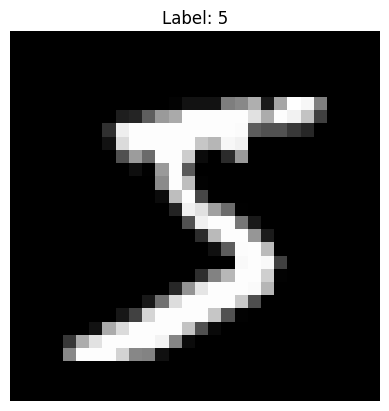

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
print("Loading the MNIST dataset...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("MNIST dataset loaded successfully.")

# Display the shapes of the datasets
print("\nShape of training data:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing data:", x_test.shape)
print("Shape of testing labels:", y_test.shape)

# Display an example image and its label
print("\nDisplaying an example image and its label:")
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

## ***Step 2: Augment the Dataset with Noise***

*To enhance model robustness and simulate real-world imperfections, a noisy version of the MNIST dataset was generated. Gaussian noise was added to the images, creating a challenging variant for the model to learn from. This modification introduces complexity and tests the generalization ability of the classifier.*

Noisy MNIST dataset created.

Displaying an example of a noisy image:


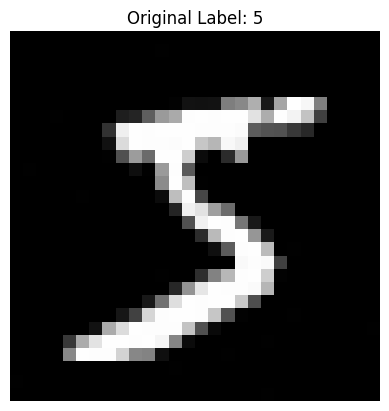

In [ ]:
# Introduce noise to the MNIST dataset

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the pixel values to be between 0 and 255
x_train_noisy = np.clip(x_train_noisy, 0., 255.)
x_test_noisy = np.clip(x_test_noisy, 0., 255.)

print("Noisy MNIST dataset created.")

# Display an example of a noisy image
print("\nDisplaying an example of a noisy image:")
plt.imshow(x_train_noisy[0], cmap='gray')
plt.title(f"Original Label: {y_train[0]}")
plt.axis('off')
plt.show()

##  ***Step 3: Preprocess the Modified Dataset***

*Normalized pixel values to a [0,1] range and reshaped the noisy MNIST images to match the input format required by neural networks. The dataset was then split into training and testing sets to ensure an unbiased evaluation of the model’s performance.*


In [ ]:
# Preprocess the noisy data for the model
# Normalize the noisy data to a range of 0-1
x_train_noisy = x_train_noisy.astype('float32') / 255.0
x_test_noisy = x_test_noisy.astype('float32') / 255.0

# Reshape the data to include a channel dimension (for Conv2D layers)
x_train_noisy = x_train_noisy.reshape(-1, 28, 28, 1)
x_test_noisy = x_test_noisy.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)


print("Preprocessing of noisy MNIST dataset complete.")
print("Shape of preprocessed noisy training features:", x_train_noisy.shape)
print("Shape of preprocessed noisy testing features:", x_test_noisy.shape)
print("Shape of one-hot encoded training labels:", y_train_one_hot.shape)
print("Shape of one-hot encoded testing labels:", y_test_one_hot.shape)

Preprocessing of noisy MNIST dataset complete.
Shape of preprocessed noisy training features: (60000, 28, 28, 1)
Shape of preprocessed noisy testing features: (10000, 28, 28, 1)
Shape of one-hot encoded training labels: (60000, 10)
Shape of one-hot encoded testing labels: (10000, 10)


## ***Step 4: Neural Network Architecture Design***

*Designed a custom Convolutional Neural Network (CNN) tailored to handle the added noise in the dataset. The architecture includes convolutional, pooling, and dense layers to efficiently extract features and classify distorted handwritten digits with improved accuracy.*


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define the model architecture
print("Defining the model architecture...")
model = Sequential([
    Input(shape=(28, 28, 1)),  # Input layer
    Conv2D(32, (3, 3), activation='relu'), # Convolutional layer with 32 filters
    MaxPooling2D((2, 2)), # Max Pooling layer
    Conv2D(64, (3, 3), activation='relu'), # Convolutional layer with 64 filters
    MaxPooling2D((2, 2)), # Max Pooling layer
    Flatten(), # Flatten layer to convert 2D feature maps to 1D vector
    Dense(10, activation='softmax') # Dense layer with 10 output units for classification
])
print("Model architecture defined.")

# Compile the model
print("\nCompiling the model...")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

# Print a summary of the model architecture
print("\nModel Summary:")
model.summary()

Defining the model architecture...
Model architecture defined.

Compiling the model...
Model compiled successfully.

Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## ***Step 5: Train the Model on Noisy MNIST Data***

*Trained the designed CNN model on the preprocessed noisy MNIST dataset using appropriate hyperparameters like batch size, epochs, and optimizer. Monitored training and validation performance to ensure effective learning and prevent overfitting.*



In [ ]:
print("Training the model...")
# Train the model using the noisy training data and one-hot encoded labels
history = model.fit(x_train_noisy, y_train_one_hot, epochs=5, batch_size=32, verbose=1, validation_split=0.1)
print("Training complete.")

Training the model...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.8879 - loss: 0.3747 - val_accuracy: 0.9803 - val_loss: 0.0671
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9819 - loss: 0.0576 - val_accuracy: 0.9880 - val_loss: 0.0400
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9883 - loss: 0.0390 - val_accuracy: 0.9883 - val_loss: 0.0402
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9898 - loss: 0.0301 - val_accuracy: 0.9875 - val_loss: 0.0432
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9922 - loss: 0.0245 - val_accuracy: 0.9892 - val_loss: 0.0436
Training complete.


## ***Step 6: Evaluate and Analyze Model Performance***

*Evaluated the trained model using accuracy, loss, and confusion matrix metrics on the test set. Visualized sample predictions to assess how well the model performs on noisy inputs and identified misclassified examples to explore potential areas for improvement.*




Evaluating the model on noisy test data...
Test loss: 0.03355132043361664
Test accuracy: 0.9890000224113464
Evaluation complete.
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Visualizing some predictions on noisy test data:


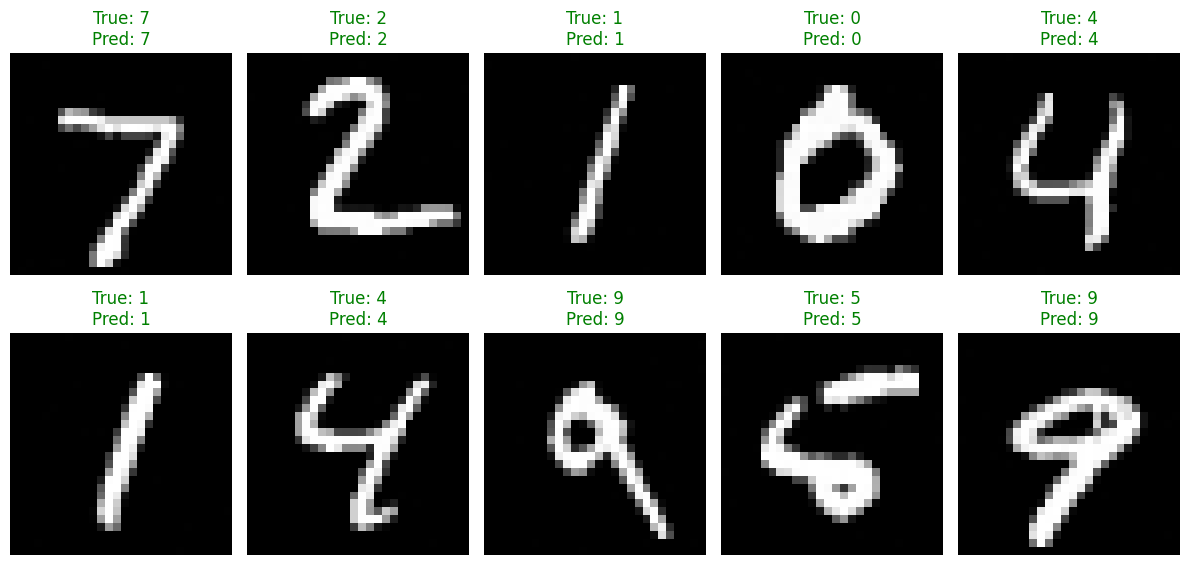

Sample predictions plot saved as sample_predictions.png


In [35]:
# Evaluate the model on the noisy test data
print("\nEvaluating the model on noisy test data...")
loss, accuracy = model.evaluate(x_test_noisy, y_test_one_hot, verbose=0)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")
print("Evaluation complete.")

# Get predictions for analysis
predicted_probabilities = model.predict(x_test_noisy)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
true_labels = np.argmax(y_test_one_hot, axis=1)

# Visualize some predictions
print("\nVisualizing some predictions on noisy test data:")
num_examples_to_visualize = 10
plt.figure(figsize=(12, 6))
for i in range(num_examples_to_visualize):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_classes[i]}", color='green' if predicted_classes[i] == true_labels[i] else 'red')
    plt.axis('off')

plt.tight_layout()
plt.savefig('sample_predictions.png') # Added this line to save the figure
plt.show()

print("Sample predictions plot saved as sample_predictions.png")

## ***Step 7: Accuracy and Loss Visualization***

*To monitor model performance during training, accuracy and loss values were recorded at each epoch. The following plot helps understand how well the model learned from the noisy MNIST dataset.*


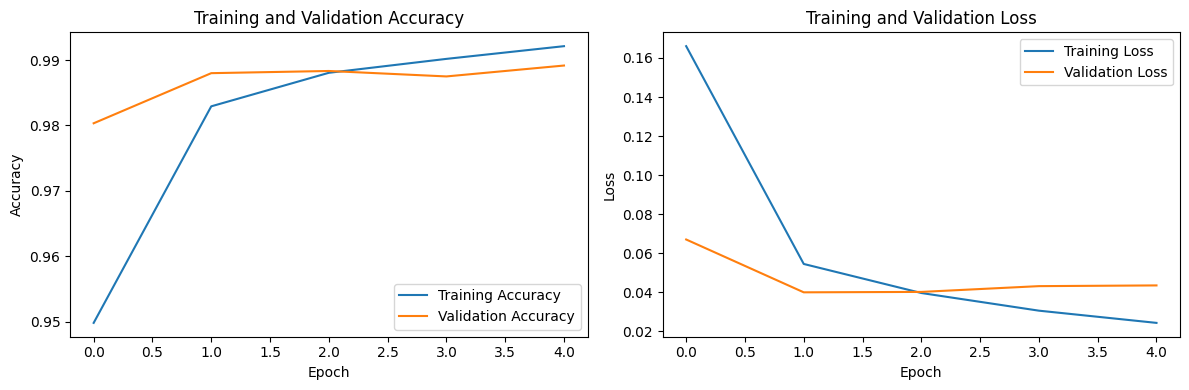

Accuracy and loss plot saved as accuracy_loss_plot.png


In [34]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('accuracy_loss_plot.png')
plt.show()

print("Accuracy and loss plot saved as accuracy_loss_plot.png")